In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

load dataset

In [2]:
data = load_breast_cancer()

In [3]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
X = data.data

In [5]:
df['y'] = data.target


In [6]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

check any null values in dataset

In [7]:
print(pd.isnull(data))

False


In [8]:
scaler = StandardScaler()
featured_data = pd.DataFrame(scaler.fit_transform(df.iloc[:, :-1]), columns=df.columns[:-1])

In [9]:
featured_data.shape

(569, 30)

In [10]:
featured_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


Checking class distribution --> data is balaced or not

In [11]:
import seaborn as sns

[]

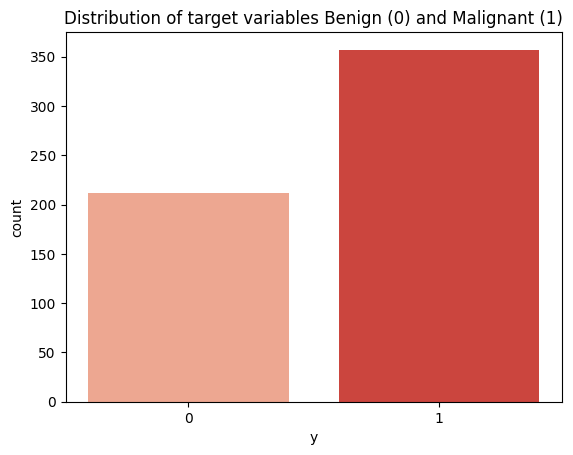

In [12]:
sns.countplot(x=df['y'], palette='Reds')
plt.title('Distribution of target variables Benign (0) and Malignant (1)')
plt.plot()


In [13]:
print(df['y'].value_counts())

y
1    357
0    212
Name: count, dtype: int64


In [14]:
benign_percent = (df['y'].value_counts()[0]/len(df))*100
melignant_percent = (df['y'].value_counts()[1]/len(df))*100
print("benign_percent : ", benign_percent)
print("melignant_percent : ", melignant_percent)

benign_percent :  37.258347978910365
melignant_percent :  62.741652021089635


Checking data contains outliers or not

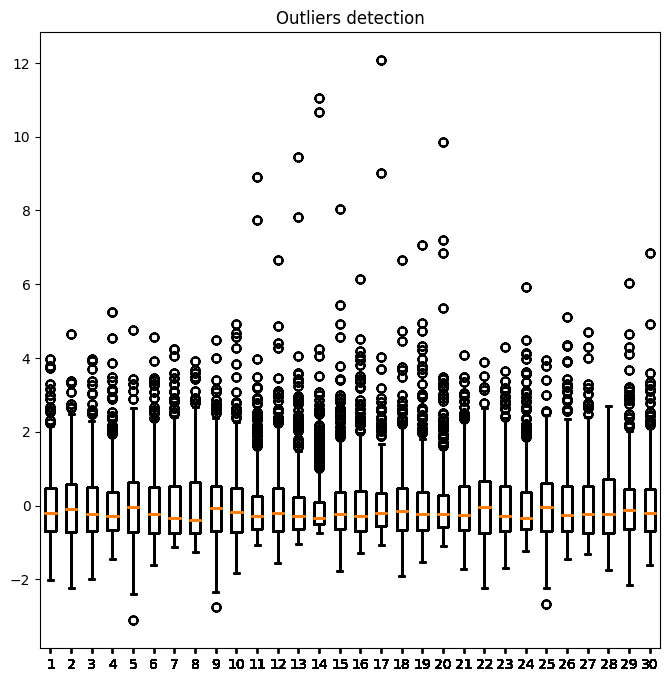

In [15]:
features=['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension']
plt.figure(figsize=(8,8))
for i in features:
    plt.boxplot(featured_data[features])
plt.title("Outliers detection")
plt.show()

Remove the outliers from data using Interquartile Range

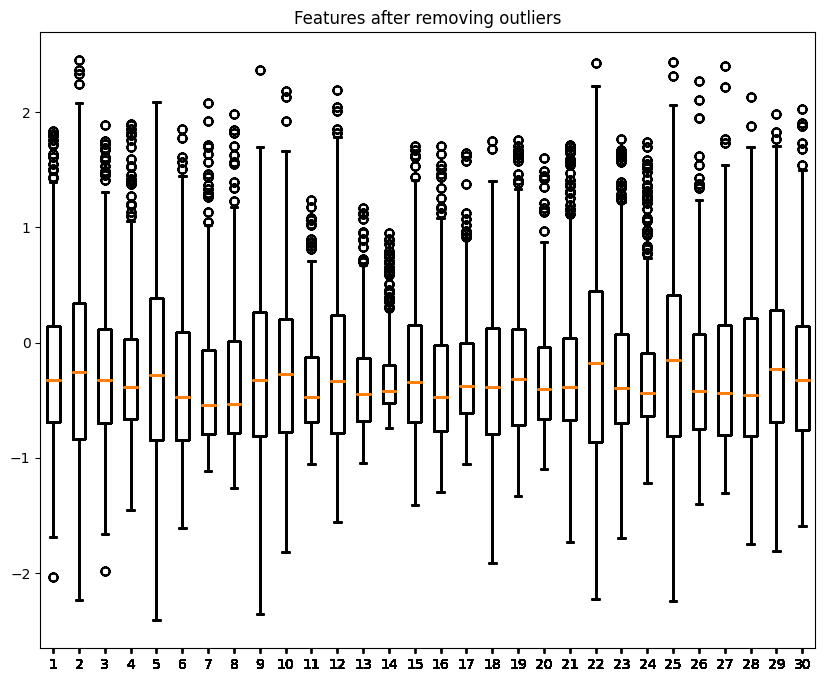

In [16]:
def remove_outliers(featured_data):
    Q1 = featured_data.quantile(0.25)
    Q3 = featured_data.quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    return featured_data[(featured_data>=lower_bound) & (featured_data <= upper_bound)].dropna()

filtered_data = remove_outliers(featured_data)
features =['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension']

plt.figure(figsize=(10,8))
for i in features:
    plt.boxplot(filtered_data[features])
plt.title("Features after removing outliers")
plt.show()

checking by decreaing lower_bound and upper_bound value from 1.5 to 1.0 to check it will cover the outliers

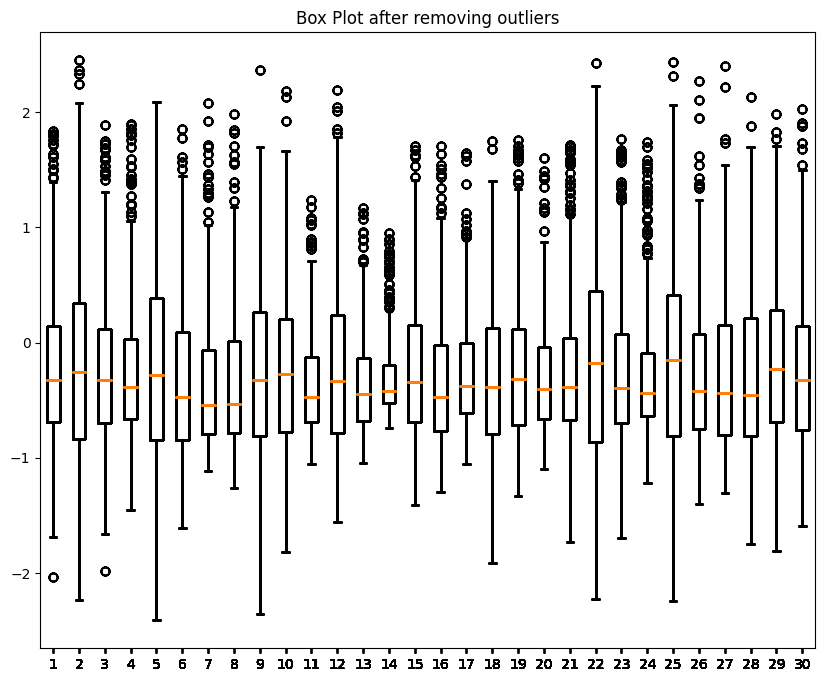

In [17]:
def remove_outliers(featured_data, y):
    Q1 = featured_data.quantile(0.25)
    Q3 = featured_data.quantile(0.75)
    IQR = Q3-Q1

    lower_bound = Q1-1.0*IQR
    upper_bound = Q3+1.0*IQR
    mask = (featured_data>=lower_bound) & (featured_data <= upper_bound)
    filtered_df = featured_data[mask].dropna()
    filtered_y = y.loc[filtered_df.index]
    return filtered_df, filtered_y

X_filtered,y_filtered = remove_outliers(featured_data, df['y'])
features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension']
plt.figure(figsize=(10,8))
for i in features:
    plt.boxplot(filtered_data[features])
plt.title("Box Plot after removing outliers")
plt.show()

In [18]:
X = featured_data
X.shape

(569, 30)

In [19]:
y = df['y']
y.shape

(569,)

In [20]:
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

Feature Importance in ascending order

In [21]:

from sklearn.ensemble import RandomForestClassifier

In [22]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [23]:
rf.fit(X,y)

RandomForestClassifier(random_state=42)

In [24]:
importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True)
print(importance)

mean fractal dimension     0.002615
mean symmetry              0.003423
symmetry error             0.003546
texture error              0.003744
concave points error       0.003760
worst fractal dimension    0.004497
smoothness error           0.004722
compactness error          0.005612
concavity error            0.005820
fractal dimension error    0.005942
mean smoothness            0.007958
worst symmetry             0.008179
perimeter error            0.010085
mean compactness           0.011597
worst smoothness           0.012232
radius error               0.014264
mean texture               0.015225
worst texture              0.017485
worst compactness          0.019864
area error                 0.029553
mean radius                0.034843
worst concavity            0.037339
mean area                  0.060462
mean concavity             0.066917
mean perimeter             0.067990
worst perimeter            0.080850
worst radius               0.082848
mean concave points        0

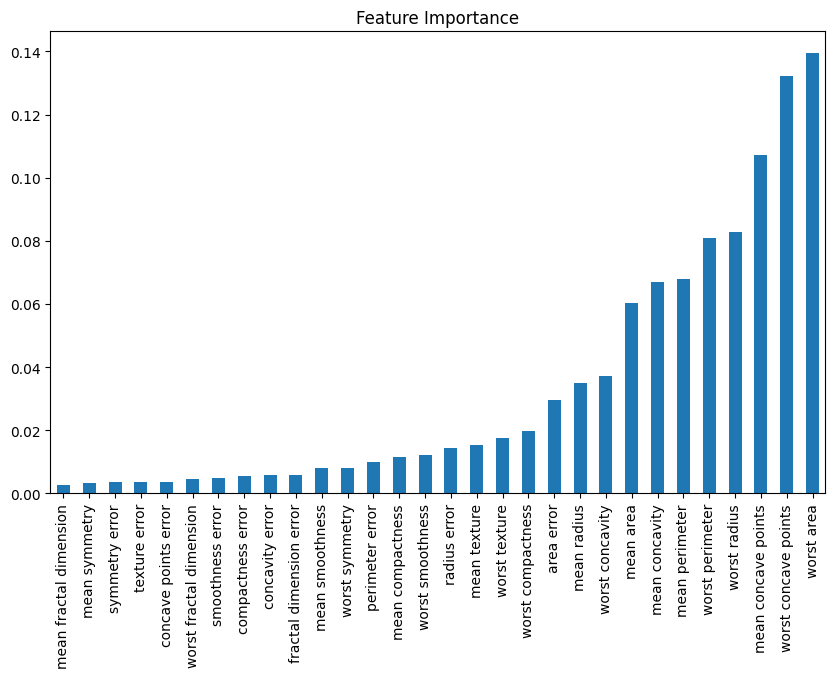

In [25]:
importance.plot(kind='bar', figsize=(10,6),title="Feature Importance")
plt.show()

By observing the above graph, 'mean radius', 'worst concavity','mean area', 'mean concavity', 'mean perimeter', 'worst perimeter', 'worst radius', 'mean concave points', 'worst concave points', 'worst area'  have more importance. So, we take this features for further analysis

In [26]:
scaler = StandardScaler()
selected_columns = [
    'mean radius', 'worst concavity', 'mean area', 'mean concavity', 'mean perimeter', 
    'worst perimeter', 'worst radius', 'mean concave points', 'worst concave points', 'worst area'
]
df_scaled = pd.DataFrame(scaler.fit_transform(df[selected_columns]), columns=selected_columns)

In [27]:
X = df_scaled
y = df['y']

Split data into training and testing 

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

handle imbalanced data using SMOT(Synthetic Minority Oversampling Technique)

In [29]:
from imblearn.over_sampling import SMOTE
smote =  SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [30]:
print(X_train.shape)

(572, 10)


In [31]:
print(X_test.shape)

(114, 10)


In [32]:
y.shape

(569,)

Now, train the model by applying different algorithms and show that which model get more accurate results

1. Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
from sklearn.metrics import classification_report,f1_score,precision_score,recall_score,accuracy_score,confusion_matrix,roc_curve,auc, roc_auc_score 

In [35]:
log_reg = LogisticRegression()

Hyerparameter tuning

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
param_grid_logistic = {
    'penalty': ['l1', 'l2'],  # Remove 'elasticnet'
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 200, 300],
    'solver': ['saga', 'liblinear']
}


In [38]:
grid_cv = GridSearchCV(log_reg, param_grid_logistic, cv=5, scoring='accuracy')
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['saga', 'liblinear']},
             scoring='accuracy')

In [39]:
print("Best Hyperparameters : ", grid_cv.best_params_)

Best Hyperparameters :  {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [40]:
best_gridcv_logistic = LogisticRegression(**grid_cv.best_params_, random_state=42)
best_gridcv_logistic.fit(X_train, y_train)

LogisticRegression(C=10, random_state=42, solver='liblinear')

In [41]:
y_pred = best_gridcv_logistic.predict(X_test)
y_pred_proba = best_gridcv_logistic.predict_proba(X_test)[:, 1]

In [42]:
train_accuracy = best_gridcv_logistic.score(X_train, y_train)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)

In [43]:
print("Train Accuracy Score : ", train_accuracy)
print("Test Accuracy Score : ", accuracy)
print("precision Score : ", precision)
print("recall Score : ", recall)
print("f1 Score : ", f1)
print("ÄUC Score : ", auc_score)

Train Accuracy Score :  0.9615384615384616
Test Accuracy Score :  0.9824561403508771
precision Score :  0.9859154929577465
recall Score :  0.9859154929577465
f1 Score :  0.9859154929577465
ÄUC Score :  0.998689813298395


In [44]:
classi_report = classification_report(y_test, y_pred)
print("Classification Report : \n", classi_report)

Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Calculating false positive rate, true positive rate, threshold values

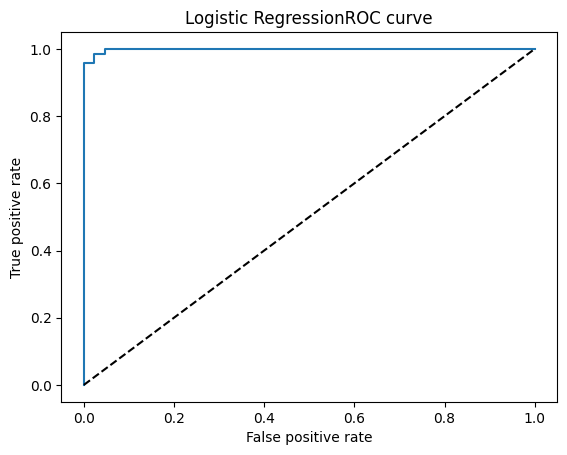

In [45]:
false_pos,true_pos,threshold = roc_curve(y_test, y_pred_proba)
#computing area under the curve
auc_score = auc(false_pos,true_pos)
plt.plot(false_pos,true_pos,label=f'AUC={auc_score:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Logistic RegressionROC curve")
plt.show()

2. Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

Hyperparameter Tuning
1. GridSearchCV

In [47]:
param_grid = {
    'max_depth':[3,5,10, None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,5],
    'criterion':['gini','entropy','log_loss']
}

In [48]:
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [49]:
print("Best Hyperparameters : ", grid_search.best_params_)

Best Hyperparameters :  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [50]:
dt_gridcv = DecisionTreeClassifier(**grid_search.best_params_, random_state=42)
dt_gridcv.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [51]:
y_pred_grid_dt = dt_gridcv.predict(X_test)

In [52]:
y_pred_grid_dt_prob = dt_gridcv.predict_proba(X_test)[:,-1]
y_pred_grid_dt = (y_pred_grid_dt_prob>0.5).astype(int)

In [53]:
print("GridSearchCV model perfomance : ")
print("Train Accuracy score : ", dt_gridcv.score(X_train, y_train))
print("Test Accuracy Score : ", accuracy_score(y_test, y_pred_grid_dt))
print("Precision : ", precision_score(y_test, y_pred_grid_dt))
print("Recall : ", recall_score(y_test, y_pred_grid_dt))
print("F1 Score : ", f1_score(y_test, y_pred_grid_dt))
print("AUC Score : ", roc_auc_score(y_test, y_pred_grid_dt))
print("Clasiification Report : \n", classification_report(y_test, y_pred_grid_dt), "\n\n")

GridSearchCV model perfomance : 
Train Accuracy score :  0.9685314685314685
Test Accuracy Score :  0.9385964912280702
Precision :  0.9324324324324325
Recall :  0.971830985915493
F1 Score :  0.9517241379310345
AUC Score :  0.9277759580740256
Clasiification Report : 
               precision    recall  f1-score   support

           0       0.95      0.88      0.92        43
           1       0.93      0.97      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114
 




2. RandomizedSearchCV

In [54]:
from sklearn.model_selection import RandomizedSearchCV

In [55]:
param_distribution ={
    'max_depth':[3,5,10,None],
    'min_samples_split':np.arange(2,20,2),
    'min_samples_leaf':np.arange(1,10,1),
    'criterion':['gini','entropy','log_loss']
}

In [56]:
random_cv = RandomizedSearchCV(dt,param_distribution,cv=5, scoring='accuracy')
random_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [3, 5, 10, None],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])},
                   scoring='accuracy')

In [57]:
print("Best Hyperparameters : ", random_cv.best_params_)

Best Hyperparameters :  {'min_samples_split': 8, 'min_samples_leaf': 3, 'max_depth': 10, 'criterion': 'entropy'}


In [58]:
dt_randomcv = DecisionTreeClassifier(**random_cv.best_params_, random_state=42)
dt_randomcv.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=3,
                       min_samples_split=8, random_state=42)

In [59]:
y_pred_random_dt = dt_randomcv.predict(X_test)

In [60]:
y_pred_random_dt_prob = dt_randomcv.predict_proba(X_test)[:,1]
y_pred_random_dt = (y_pred_random_dt_prob>0.5).astype(int)

Now evalute the both model performance

In [61]:
print("RandomizedSearchCV model performance : ")
print("Train Accuracy score : ", dt_randomcv.score(X_train, y_train))
print("Test accuracy Score : ", accuracy_score(y_test,y_pred_random_dt))
print("AUC Score : ", roc_auc_score(y_test, y_pred_random_dt))
print("Classification Report : \n", classification_report(y_test, y_pred_random_dt))

RandomizedSearchCV model performance : 
Train Accuracy score :  0.9807692307692307
Test accuracy Score :  0.9298245614035088
AUC Score :  0.9207337045528988
Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.88      0.90        43
           1       0.93      0.96      0.94        71

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



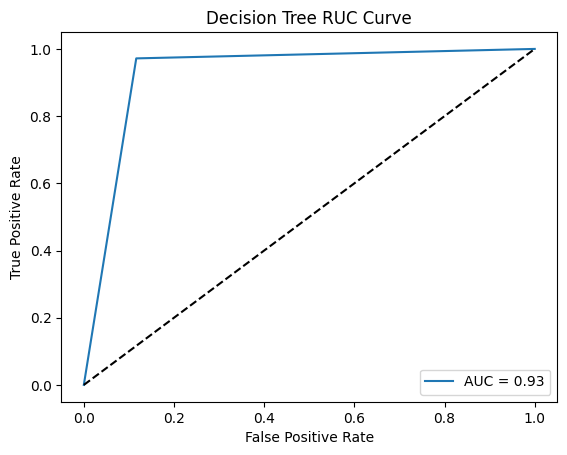

In [62]:
false_pos,true_pos,threshold = roc_curve(y_test,y_pred_grid_dt)
auc_score = auc(false_pos,true_pos)

plt.plot(false_pos,true_pos,label=f'AUC = {auc_score:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree RUC Curve')
plt.legend()
plt.show()

3. Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rf = RandomForestClassifier(n_estimators=5, criterion='gini', random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=42)

In [65]:
y_pred = rf.predict(X_test)

In [66]:
print("Train Accuracy score : ", rf.score(X_train, y_train))
print("Test Accuracy Score : ", accuracy_score(y_test, y_pred))
print("Classification Report : \n",classification_report(y_test, y_pred))

Train Accuracy score :  0.9947552447552448
Test Accuracy Score :  0.9649122807017544
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Hyperparameter Tuning
1.GridSearchCV model

In [67]:
param_grid_rf = {
    'n_estimators': [50, 100, 150],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Min samples to split a node
    'min_samples_leaf': [1, 2, 4]  # Min samples in leaf node
}

In [68]:
grid_cv_rf = RandomForestClassifier(random_state=42)
grid_cv_rf_train = GridSearchCV(grid_cv_rf, param_grid_rf, cv=5, scoring='accuracy')
grid_cv_rf_train.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [69]:
print("Best Hyperparameters : ", grid_cv_rf_train.best_params_)

Best Hyperparameters :  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}


In [70]:
rf_gridcv = RandomForestClassifier(**grid_cv_rf_train.best_params_, random_state=42)
rf_gridcv.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, n_estimators=150, random_state=42)

In [71]:
y_pred_rf_gridcv = rf_gridcv.predict(X_test)

In [72]:
y_pred_rf_gridcv_prob = rf_gridcv.predict_proba(X_test)[:,1]
y_pred_rf_gridcv = (y_pred_rf_gridcv_prob>0.5).astype(int)

In [73]:
print("GridSearchCV model ")
print("Train Accuracy score : ", rf_gridcv.score(X_train, y_train))
print("Test Accuracy score : ",accuracy_score(y_test, y_pred_rf_gridcv))
print("Precision : ", precision_score(y_test, y_pred_rf_gridcv))
print("Recall : ", recall_score(y_test, y_pred_rf_gridcv))
print("F1 Score : ", f1_score(y_test, y_pred_rf_gridcv))
print("AUC Score : ", roc_auc_score(y_test,y_pred_rf_gridcv_prob))
print("Classification Report : \n", classification_report(y_test, y_pred_rf_gridcv))

GridSearchCV model 
Train Accuracy score :  0.9912587412587412
Test Accuracy score :  0.9736842105263158
Precision :  0.9857142857142858
Recall :  0.971830985915493
F1 Score :  0.9787234042553191
AUC Score :  0.9954143465443825
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



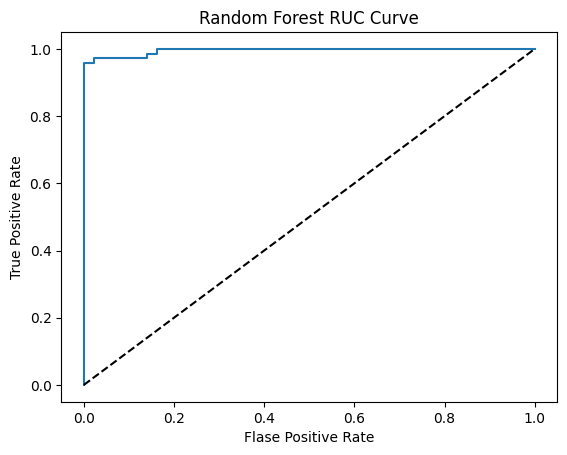

In [74]:
false_pos,true_pos,threshold = roc_curve(y_test, y_pred_rf_gridcv_prob)
auc_score = auc(false_pos,true_pos)

plt.plot(false_pos,true_pos,label=f'AUC = {auc_score:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("Flase Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest RUC Curve")
plt.show()

4. SVM(Support Vector Machine)

In [75]:
from sklearn.svm import SVC

In [76]:
svm_model = SVC(kernel='linear')

check best kernel suited to our data 
i.e - linear, RBF(Radial Basis Function), sigmoid, polynomial

In [77]:
param_grid_svm ={
    'kernel':['linear','rfd','poly','sigmoid'],
    'C':[0.1,1,10,100],
    'gamma':['scale','auto',0.001,0.01,0.1,1]
}

In [78]:
svm_gridcv = GridSearchCV(SVC(),param_grid_svm, cv=5,scoring='accuracy')
svm_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rfd', 'poly', 'sigmoid']},
             scoring='accuracy')

In [79]:
print("Best Hyperparameters : ", svm_gridcv.best_params_)

Best Hyperparameters :  {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


In [80]:
svm_model = SVC(**svm_gridcv.best_params_,probability=True)
svm_model.fit(X_train, y_train)

SVC(C=10, kernel='linear', probability=True)

In [81]:
y_pred_svm = svm_model.predict(X_test)

In [82]:
y_pred_svm_prob = svm_model.predict_proba(X_test)[:,1]
y_pred_svm = (y_pred_svm_prob > 0.5).astype(int)

In [83]:
print("Train Accuracy Score : ", svm_model.score(X_train,y_train))
print("Test Accuracy Score : ", accuracy_score(y_test, y_pred_svm))
print("Precision : ", precision_score(y_test, y_pred_svm))
print("Recall : ", recall_score(y_test, y_pred_svm))
print("F1 Score : ", f1_score(y_test, y_pred_svm))
print("AUC score : ", roc_auc_score(y_test, y_pred_svm_prob))
print("Classification Report : \n", classification_report(y_test, y_pred_svm))

Train Accuracy Score :  0.9667832167832168
Test Accuracy Score :  0.9824561403508771
Precision :  0.9859154929577465
Recall :  0.9859154929577465
F1 Score :  0.9859154929577465
AUC score :  0.9990173599737963
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



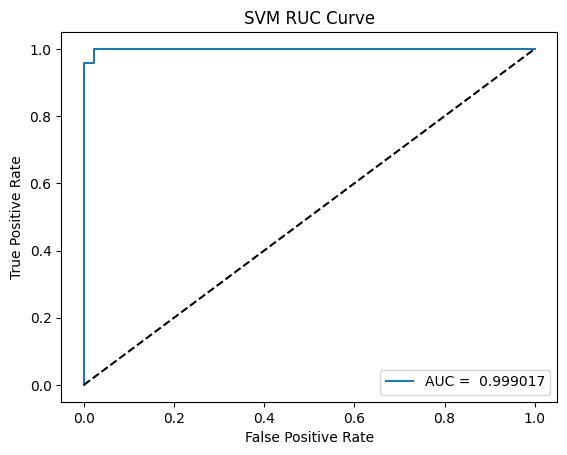

In [84]:
false_pos,true_pos,threshold = roc_curve(y_test, y_pred_svm_prob)
auc_score = auc(false_pos,true_pos)

plt.plot(false_pos,true_pos,label=f'AUC = {auc_score: 2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM RUC Curve')
plt.legend()
plt.show()

5. KNN(K-Nearest Neighbour)

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [87]:
y_pred_knn = knn.predict(X_test)
print(y_pred_knn[:10])

[1 0 0 1 1 0 0 0 0 1]


Measure performance of model

In [88]:
print("Train Accuracy Score : ", knn.score(X_train, y_train))
print("Test Accuracy Score : ", accuracy_score(y_test, y_pred_knn))
print("Precision : ", precision_score(y_test, y_pred_knn))
print("Recall : ", recall_score(y_test, y_pred_knn))
print("F1 Score : ", f1_score(y_test, y_pred_knn))
print("Classification Report : \n", classification_report(y_test, y_pred_knn))

Train Accuracy Score :  0.9685314685314685
Test Accuracy Score :  0.9736842105263158
Precision :  0.9857142857142858
Recall :  0.971830985915493
F1 Score :  0.9787234042553191
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Hyperparameter tuning using GridSearchCV model


In [89]:
param_grid_knn ={
    'n_neighbors': range(1, 21, 2), 
    'metric':['euclidean','manhattan','minkowski'],
    'weights':['uniform','distance']
}

In [90]:
knn_model = KNeighborsClassifier()
gridcv_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
gridcv_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 21, 2),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [91]:
print("Best Hyperparameters : ", gridcv_knn.best_params_)

Best Hyperparameters :  {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [92]:
knn_model= KNeighborsClassifier(**gridcv_knn.best_params_)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [93]:
y_pred_knn = knn_model.predict(X_test)

In [94]:
y_pred_knn_prob = knn_model.predict_proba(X_test)[:,1]
y_pred_knn = (y_pred_knn_prob > 0.5).astype(int)

Check performance of model

In [95]:
print("Train Accuracy Score : ", knn_model.score(X_train,y_train))
print("Test Accuracy Score : ", accuracy_score(y_test, y_pred_knn))
print("Precision : ", precision_score(y_test, y_pred_knn))
print("Recall : ", recall_score(y_test, y_pred_knn))
print("F1 Score : ", f1_score(y_test, y_pred_knn))
print("AUC Score : ",roc_auc_score(y_test, y_pred_knn_prob))
print("Classification Report : \n",classification_report(y_test, y_pred_knn))

Train Accuracy Score :  1.0
Test Accuracy Score :  0.9824561403508771
Precision :  1.0
Recall :  0.971830985915493
F1 Score :  0.9857142857142858
AUC Score :  0.9849328529315428
Classification Report : 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        43
           1       1.00      0.97      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



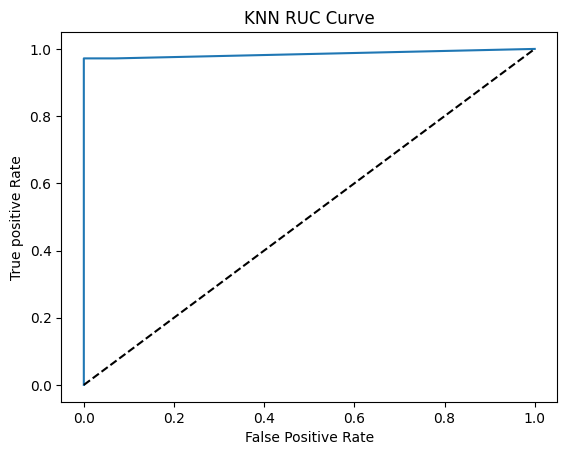

In [96]:
false_pos,true_pos,threshold = roc_curve(y_test,y_pred_knn_prob)
auc_score = auc(false_pos,true_pos)

plt.plot(false_pos,true_pos,label=f'AUC = {auc_score:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True positive Rate")
plt.title("KNN RUC Curve")
plt.show()


6. Naive Bayes

In [97]:
from sklearn.naive_bayes import GaussianNB

In [98]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [99]:
y_pred_nb = nb.predict(X_test)

See model performance using metrics

In [100]:
print("Train Accuracy Score : ", nb.score(X_train, y_train))
print("Test Accuracy Score : ",accuracy_score(y_test, y_pred_nb))
print("Classification Report : \n",classification_report(y_test,y_pred_nb))

Train Accuracy Score :  0.9405594405594405
Test Accuracy Score :  0.9649122807017544
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Hyperparameter Tuning - GridSearchCV model

In [101]:
param_grid_nb={
    'var_smoothing':[1e-9,1e-8,1e-7,1e-6,1e-5,1e-4]
}

In [102]:
nb = GaussianNB()
grid_cv_nb = GridSearchCV(nb,param_grid_nb, cv=5, scoring='accuracy')
grid_cv_nb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001]},
             scoring='accuracy')

In [103]:
print("Best Hyperparameters : ", grid_cv_nb.best_params_)

Best Hyperparameters :  {'var_smoothing': 1e-09}


In [104]:
nb_model = GaussianNB(**grid_cv_nb.best_params_)
nb_model.fit(X_train, y_train)

GaussianNB()

In [105]:
y_pred_nb = nb_model.predict(X_test)

In [106]:
y_pred_nb_prob = nb_model.predict_proba(X_test)[:,1]
y_pred_nb = (y_pred_nb_prob >0.5).astype(int)

Evaluate Model Performance

In [107]:
print("Train Accuracy Score : ", nb_model.score(X_train,y_train))
print("Test Äccuracy Score : ", accuracy_score(y_test, y_pred_nb))
print("AUC Score : ", roc_auc_score(y_test, y_pred_nb_prob))
print("Precision : ", precision_score(y_test, y_pred_nb))
print("Recall : ", recall_score(y_test, y_pred_nb))
print("F1 Score : ", f1_score(y_test, y_pred_nb))
print("Classification Report : \n", classification_report(y_test, y_pred_nb))

Train Accuracy Score :  0.9405594405594405
Test Äccuracy Score :  0.9649122807017544
AUC Score :  0.9970520799213888
Precision :  0.958904109589041
Recall :  0.9859154929577465
F1 Score :  0.9722222222222222
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



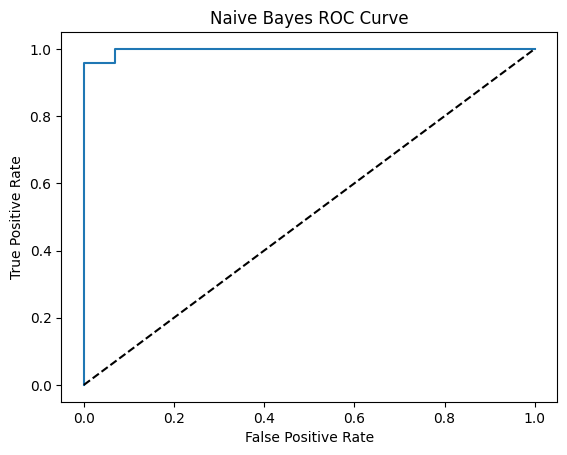

In [108]:
false_pos,true_pos,threshold = roc_curve(y_test,y_pred_nb_prob)
auc_score = auc(false_pos, true_pos)

plt.plot(false_pos, true_pos, label=f'AUC : {auc_score:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Naive Bayes ROC Curve")
plt.show()

7. XGBoost

In [109]:
import xgboost as xgb

In [110]:
xgb_model = xgb.XGBClassifier(
    booster = 'gbtree',
    learning_rate = 0.05, 
    max_depth = 4,
    min_child_weight = 2,
    gamma = 2,
    subsample = 0.8,
    colsample_bytree = 0.8,
    n_estimators = 200,
    objective='binary:logistic',
    eval_metric = 'auc',
    random_state =42
)

In [111]:
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [112]:
y_pred_xgb = xgb_model.predict(X_test)

In [113]:
y_pred_xgb_prob = xgb_model.predict_proba(X_test)[:,1]
y_pred_xgb = (y_pred_xgb>0.5).astype(int)

In [114]:
print("Train Accuracy Score : ", xgb_model.score(X_train, y_train))
print("Train Accuracy Score : ", accuracy_score(y_test, y_pred_xgb))
print("AUC Score : ", roc_auc_score(y_test, y_pred_xgb_prob))
print("Precision : ", precision_score(y_test, y_pred_xgb))
print("Recall : ", recall_score(y_test, y_pred_xgb))
print("F1 Score : ", f1_score(y_test, y_pred_xgb))
print("Classification Report : ", classification_report(y_test, y_pred_xgb))

Train Accuracy Score :  0.9790209790209791
Train Accuracy Score :  0.9649122807017544
AUC Score :  0.9954143465443825
Precision :  0.971830985915493
Recall :  0.971830985915493
F1 Score :  0.971830985915493
Classification Report :                precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



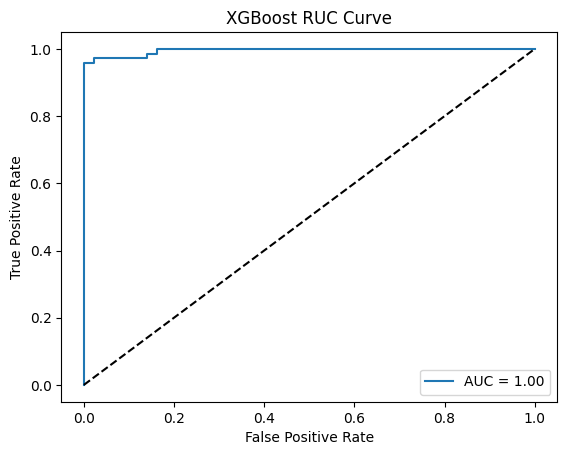

In [115]:
false_pos, true_pos, threshold = roc_curve(y_test,y_pred_xgb_prob)
auc_score = auc(false_pos,true_pos)

plt.plot(false_pos,true_pos,label=f'AUC = {auc_score:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost RUC Curve')
plt.legend()
plt.show()

Now comapare all model's performance that will give us clear vision to which model is best predict the results.

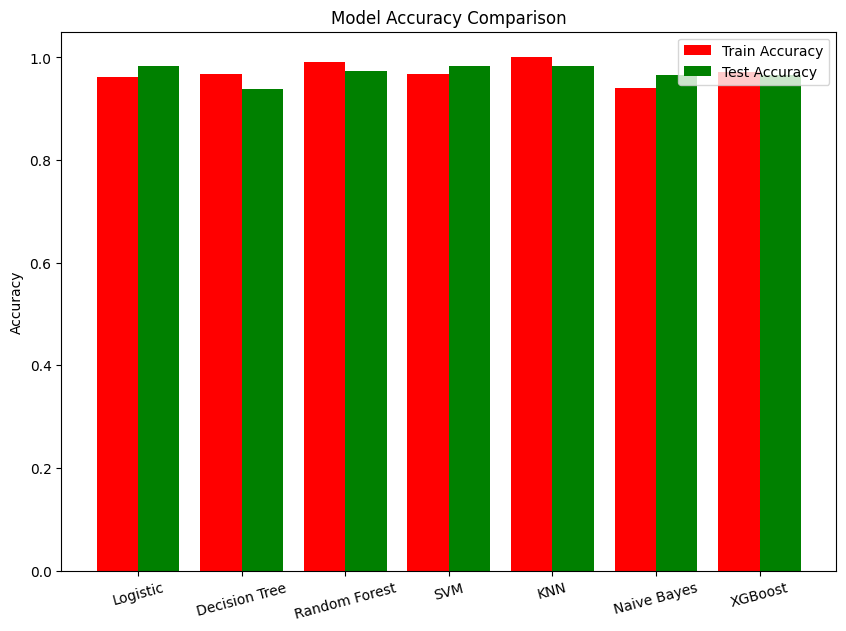

In [116]:
models = ["Logistic","Decision Tree","Random Forest","SVM","KNN","Naive Bayes","XGBoost"]
train_accuracy = [0.9615, 0.9685, 0.9912, 0.9667, 1.0, 0.9405, 0.9709]
test_accuracy = [0.9824, 0.9385, 0.9736, 0.9824, 0.9824, 0.9649, 0.9649]

x = np.arange(len(models))
plt.figure(figsize=(10,7))
plt.bar(x-0.2,train_accuracy,0.4, label="Train Accuracy", color='red')
plt.bar(x+0.2, test_accuracy, 0.4, label="Test Accuracy", color='green')
plt.xticks(x,models,rotation=15)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.legend()
plt.show()

Precision, Recall and f1-score comparision

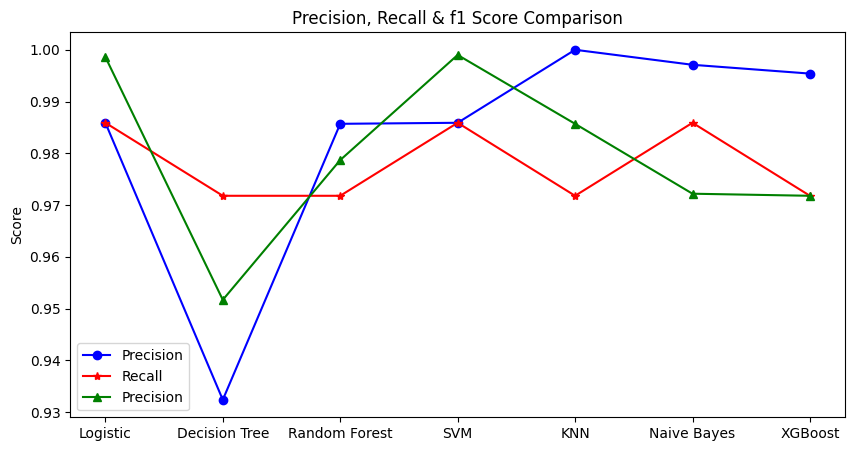

In [117]:
precision = [0.9859, 0.9324, 0.9857, 0.9859, 1.0, 0.9971, 0.9954]
recall = [0.9859, 0.9718, 0.9718, 0.9859, 0.9718, 0.9859, 0.9718]
f1_scores = [0.9986, 0.9517, 0.9787, 0.9990, 0.9857, 0.9722, 0.9718]

plt.figure(figsize=(10,5))
plt.plot(models, precision, marker='o', label='Precision', color='blue')
plt.plot(models, recall, marker='*', label='Recall', color='red')
plt.plot(models, f1_scores, marker='^',label='Precision', color='green')

plt.ylabel("Score")
plt.title("Precision, Recall & f1 Score Comparison")
plt.legend()
plt.show()

Evaluting Best Model
By observing training accuracy, testing accuracy, f1-score, precision, recall score logistic regression and SVM  is the best for prediction.

SVM is the best model to predict the results based on the performance metrics, training and testing accuracy.

In [118]:
import joblib

In [119]:
joblib.dump(svm_model, "models/breast_cancer_model.pkl")

['models/breast_cancer_model.pkl']

In [120]:
import joblib

try:
    model = joblib.load("models/breast_cancer_model.pkl")
    print("Model loaded successfully!")
except Exception as e:
    print("Error loading model:", e)


Model loaded successfully!


In [125]:
joblib.dump(scaler, "models/breast_cancer_scaler.pkl")

['models/breast_cancer_scaler.pkl']

In [127]:
model = joblib.load("models/breast_cancer_model.pkl") 
model

SVC(C=10, kernel='linear', probability=True)